# Deteksi Marka Jalan

## Import Library

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from skimage.io import imread

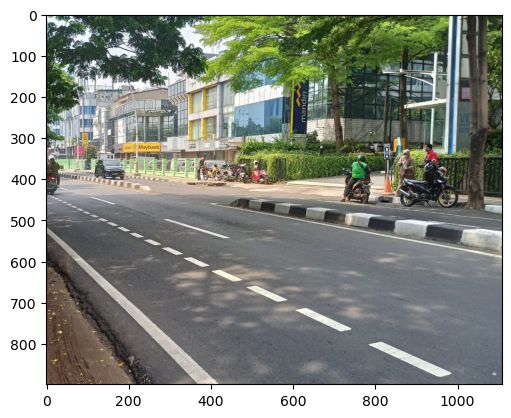

In [2]:
img = imread(fname="img/jalanan.jpg")
plt.imshow(img)

## Menampilkan Tepi pada Gambar

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#canny untuk mendeteksi tepi
edges = cv2.Canny(img, 230, 300)

Text(0.5, 1.0, 'gambar hanya tepi garis')

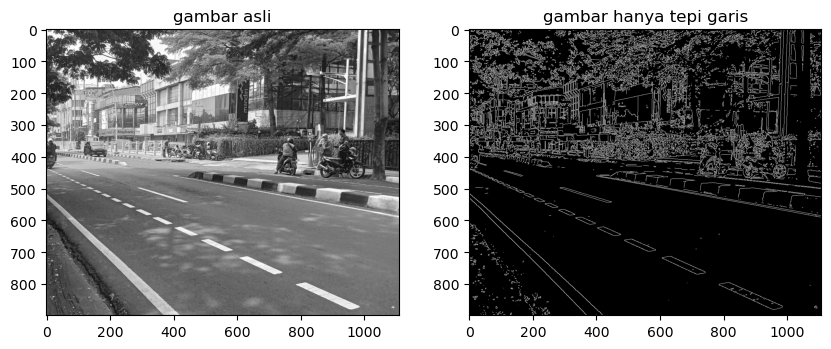

In [4]:
fig, axs = plt.subplots(1,2, figsize =(10,10))
ax = axs.ravel()

#Tampilan Asli
ax[0].imshow(gray, cmap='gray')
ax[0].set_title('gambar asli')

#Tampilan Edges
ax[1].imshow(edges, cmap='gray')
ax[1].set_title('gambar hanya tepi garis')

## Mengisolate Gambar

In [5]:
height, width = edges.shape
#mengisolasi bagian gambar yang ingin di berikan edges
triangle = np.array([
                    [(200, 1000), (30, 390), (width, 580)]
                    ])

mask = np.zeros_like(edges)
#membuat masking (segitiga untuk daerah yang dipilih untuk masking)
mask = cv2.fillPoly(mask, triangle, 255)
isolated = cv2.bitwise_and(edges, mask)

Text(0.5, 1.0, 'tepi setelah di isolasi')

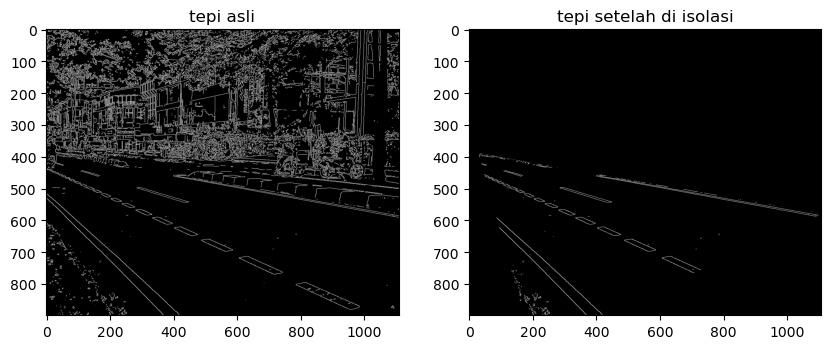

In [6]:
fig, axs = plt.subplots(1,2, figsize =(10,10))
ax = axs.ravel()

#Tampilan Asli
ax[0].imshow(edges, cmap='gray')
ax[0].set_title('Tepi asli')

#Tampilan after Isolation
ax[1].imshow(isolated, cmap='gray')
ax[1].set_title('Tepi setelah di isolasi')

## Mendekteksi Marka Jalan

In [7]:
lines = cv2.HoughLinesP(isolated, 1, np.pi/180, threshold=25 ,minLineLength=5, maxLineGap=200)
img_line = img.copy()

In [8]:
for line in lines:
    x1, y1, x2, y2, = line[0]
    cv2.line(img_line, (x1,y1), (x2,y2), (0,0,255), 1)

#(x1,y1) = sudut kiri atas garis
#(x2,y2) = sudut kanan bawah garis

img_after = cv2.cvtColor(img_line, cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'gambar Terdeteksi Marka Jalan')

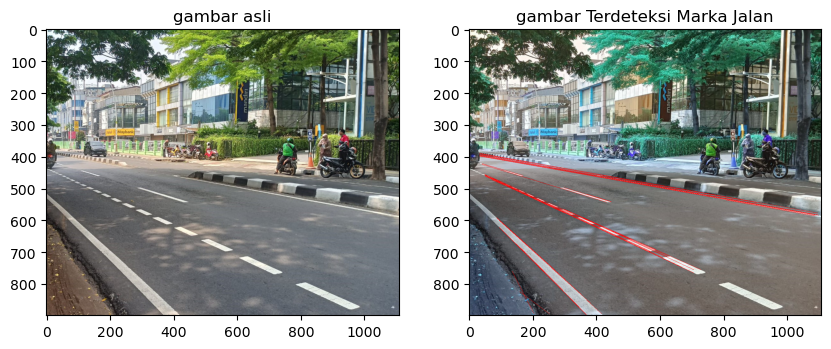

In [12]:
#Tampiln menggunakan index
fig, axs = plt.subplots(1,2, figsize = (10,10))
ax = axs.ravel()

#Tampilan Asli
ax[0].imshow(img)
ax[0].set_title('gambar asli')

#Tampilan Akhir
ax[1].imshow(img_after)
ax[1].set_title('gambar Terdeteksi Marka Jalan')

## Menyimpan Gambar

In [10]:
cv2.imwrite("img/hasil-Deteksi.png",img_after)

True